In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [101]:
start = '2013-01-01'
end = '2023-12-31'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [102]:
data.reset_index(inplace=True) #changes dates to integers 1, 2, 3...

In [103]:
data #displays data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,17.918339,18.107130,17.846855,18.013729,17.993254,102033017
1,2013-01-03,18.055573,18.229919,17.950716,18.024191,18.003704,93075567
2,2013-01-04,18.165413,18.467529,18.124067,18.380356,18.359463,110954331
3,2013-01-07,18.317591,18.415474,18.196297,18.300158,18.279356,66476239
4,2013-01-08,18.319834,18.338762,18.043119,18.264042,18.243282,67295297
...,...,...,...,...,...,...,...
2763,2023-12-22,142.130005,143.250000,142.054993,142.720001,142.557770,18494700
2764,2023-12-26,142.979996,143.945007,142.500000,142.820007,142.657669,11170100
2765,2023-12-27,142.830002,143.320007,141.050995,141.440002,141.279236,17288400
2766,2023-12-28,141.850006,142.270004,140.828003,141.279999,141.119415,12192500


In [104]:
ma_100_days = data.Close.rolling(100).mean()

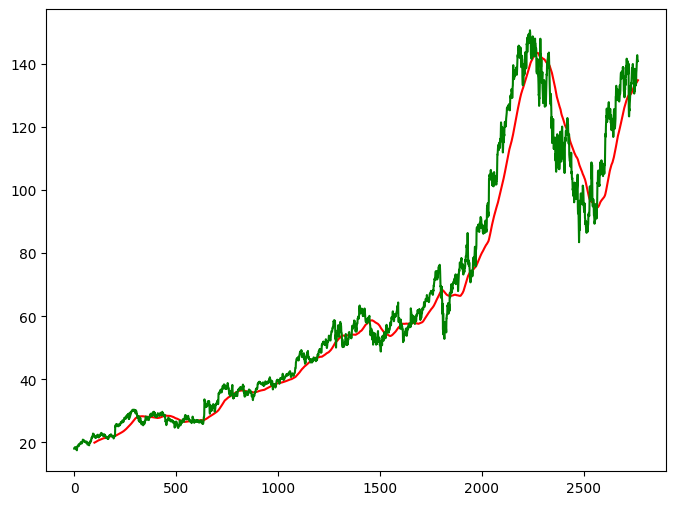

In [105]:
plt.figure(figsize=(8, 6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [106]:
ma_200_days = data.Close.rolling(200).mean()

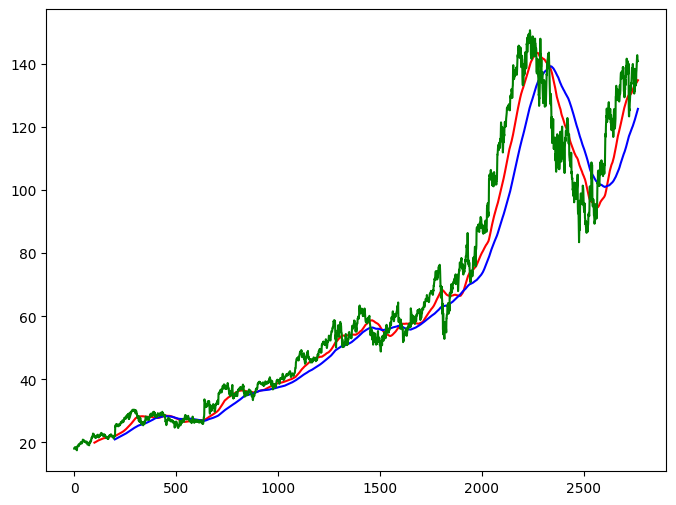

In [107]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [108]:
data.dropna(inplace=True)

In [109]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [110]:
data_train.shape[0]

2214

In [111]:
data_test.shape[0]

554

In [112]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [113]:
data_train_scale = scaler.fit_transform(data_train)

In [114]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [115]:
x, y = np.array(x), np.array(y)

In [116]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [117]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [118]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [119]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - loss: 0.0361
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - loss: 0.0049
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - loss: 0.0047
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - loss: 0.0043
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - loss: 0.0033
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - loss: 0.0026
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - loss: 0.0031
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - loss: 0.0026
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - loss: 0.0027
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - loss: 0.0026
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - loss: 0.0032
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - loss: 0.0023
Epoch 13/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - loss: 0.0019
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - loss: 0.0023
Epoch 15/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - loss: 0.0020
Epoc

In [120]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [121]:
pas_100_days = data_train.tail(100)

In [122]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [123]:
data_test_scale  =  scaler.fit_transform(data_test)

In [124]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [125]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


In [126]:
scale =1/scaler.scale_

In [127]:
y_predict = y_predict*scale

In [128]:
y = y*scale

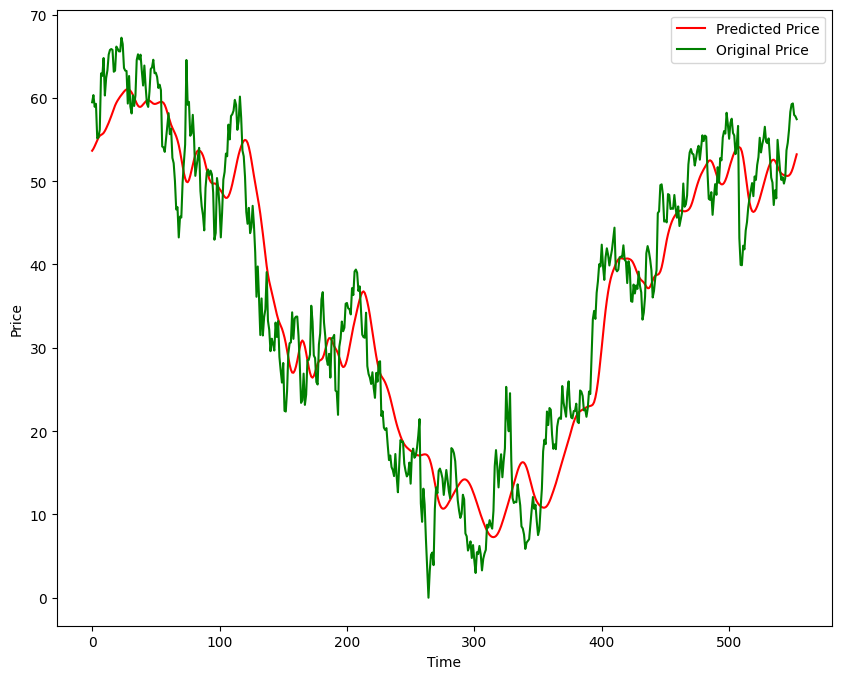

In [129]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [130]:
model.save('Stock Predictions Model.keras')